In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot data inline
%matplotlib inline

In [2]:
# Load the dataset
url  = "http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data"

"""
Attribute Information:
     1. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
     2. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
     3. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
     4. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
     5. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
     6. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
     7. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
     8. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
     9. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)
"""

names = ['L-CORE','L-SURF','L-O2','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','ADM-DECS']
df = c = pd.read_csv(url,names = names,comment='#')


In [3]:
# show the first couple lines of the dataframe
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


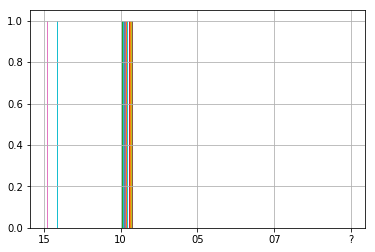

In [4]:
#histogram of COMFORT to understand the data distribution
df['COMFORT'].hist(bins=20)

In [5]:
# look more closely at the data
df['COMFORT'].value_counts()

10    65
15    19
?      3
05     2
07     1
Name: COMFORT, dtype: int64

Based on the value counts of comfort we can see that there are some non-numeric values that are going to prevent us from diong mathematical computations and plotting graphs

In [6]:
# convert the column to numeric values, fill non-numeric values with NaN
df['COMFORT']=df['COMFORT'].apply(pd.to_numeric,errors='coerce')

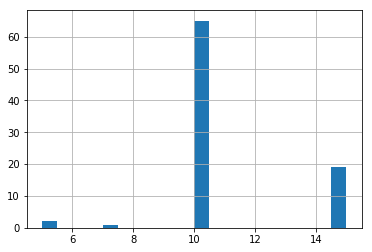

In [7]:
#histogram of COMFORT to understand the data distribution
df['COMFORT'].hist(bins=20)

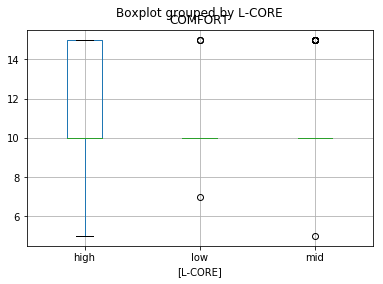

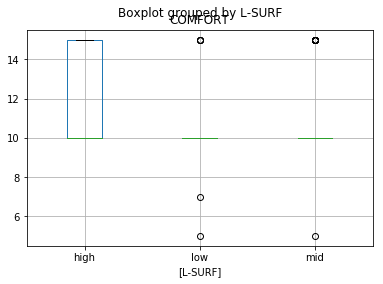

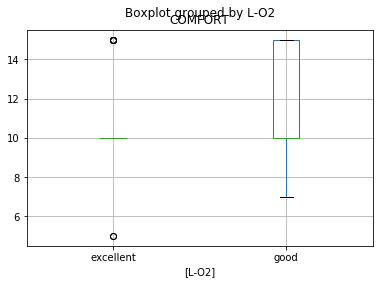

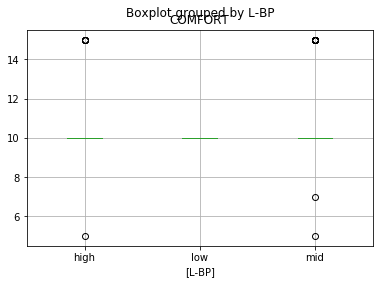

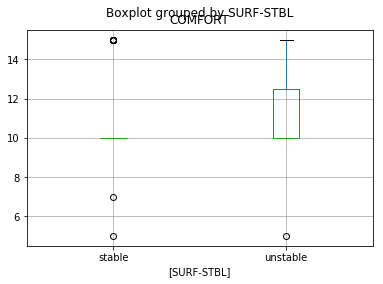

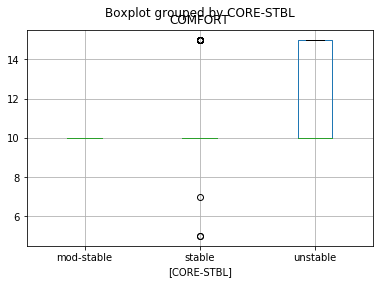

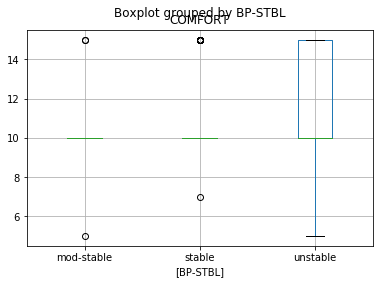

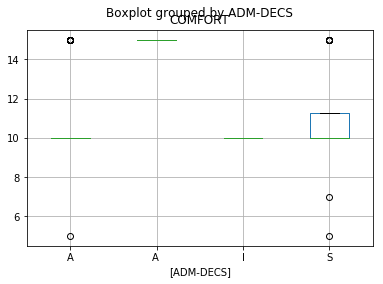

In [8]:
boxplot = df.boxplot(column=['COMFORT'],by=['L-CORE'])
boxplot = df.boxplot(column=['COMFORT'],by=['L-SURF'])
boxplot = df.boxplot(column=['COMFORT'],by=['L-O2'])
boxplot = df.boxplot(column=['COMFORT'],by=['L-BP'])
boxplot = df.boxplot(column=['COMFORT'],by=['SURF-STBL'])
boxplot = df.boxplot(column=['COMFORT'],by=['CORE-STBL'])
boxplot = df.boxplot(column=['COMFORT'],by=['BP-STBL'])
boxplot = df.boxplot(column=['COMFORT'],by=['ADM-DECS'])

Because COMFORT only takes on one of 4 values (5, 7, 10, and 15), the box plots look sparse, in the sense that it doesn't draw boxes on all of them. The graphs show that the median for all categories in 10, and some groups (like L-SURF high) have no values below 10. Upon inspection of the graphs, it also appears that in ADM-DECS, ther is an "A " in one of the cells, instead of "A". Python does not recognise these as the same, so it comes up as its own group in the graph. This value will need to be changed before future analyses can be done.

In [9]:
# based on the boxplot of ADM-DECS, we see there is an "A" that is structured differently
df['ADM-DECS'].value_counts()

A     63
S     24
I      2
A      1
Name: ADM-DECS, dtype: int64

# Preprocessing the data

In [10]:
# find the errant value of "A "
df.loc[df['ADM-DECS']==("A ")]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A


In [11]:
# change "A " to A
df.loc[3,'ADM-DECS']="A"

In [12]:
# confirm changes by looking at value counts
df['ADM-DECS'].value_counts()

A    64
S    24
I     2
Name: ADM-DECS, dtype: int64

In [13]:
df.isnull().sum()

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64

We still have 3 missing values in COMFORT. For now, I will remove the rows with missing values. There are only three and the data is not extremely complex that we will lose a lot of information. However depending on how the data is to be used, we could apply some type of imputation method rather than removing data. 

In [14]:
df.dropna()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
5,high,low,good,mid,stable,stable,unstable,15.0,S
6,mid,low,excellent,high,stable,stable,mod-stable,5.0,S
7,high,mid,excellent,mid,unstable,unstable,stable,10.0,S
8,mid,high,good,mid,stable,stable,stable,10.0,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10.0,S


For machine learning, all values passed into the algorith must be numeric. Therefore, for categorical data with ordinal mapping, we can set the numeric equivalent for each value.

In [15]:
# Ordinal mapping
hml_mapping = {'high': 3,'mid': 2,'low': 1}
egfp_mapping = {'excellent': 4,'good': 3,'fair': 2,'poor': 1}
stbl_mapping = {'stable': 3,'mod-stable': 2,'unstable': 1}

In [16]:
# 7 of the columns have ordinal mapping, only the last column does not
df['L-CORE'] = df['L-CORE'].map(hml_mapping)
df['L-SURF'] = df['L-SURF'].map(hml_mapping)
df['L-O2'] = df['L-O2'].map(egfp_mapping)
df['L-BP'] = df['L-BP'].map(hml_mapping)
df['SURF-STBL'] = df['SURF-STBL'].map(stbl_mapping)
df['CORE-STBL'] = df['CORE-STBL'].map(stbl_mapping)
df['BP-STBL'] = df['BP-STBL'].map(stbl_mapping)

In [17]:
df.dtypes

L-CORE         int64
L-SURF         int64
L-O2           int64
L-BP           int64
SURF-STBL      int64
CORE-STBL      int64
BP-STBL        int64
COMFORT      float64
ADM-DECS      object
dtype: object

All columns except 'ADM-DECS' are now numeric. Since 'ADM-DECS' is a nominal value, we need to use a One Hot Encoding type of conversion.

In [18]:
from sklearn.preprocessing import LabelEncoder

ADM_le = LabelEncoder()
df['ADM-DECS']=ADM_le.fit_transform(df['ADM-DECS'])
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,2,1,4,2,3,3,3,15.0,0
1,2,3,4,3,3,3,3,10.0,2
2,3,1,4,3,3,3,2,10.0,0
3,2,1,3,3,3,1,2,15.0,0
4,2,2,4,3,3,3,3,10.0,0


In [19]:
one_hot = pd.get_dummies(df['ADM-DECS'],prefix='ADM-DECS')
df = df.drop('ADM-DECS',axis=1)
df=df.join(one_hot)
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS_0,ADM-DECS_1,ADM-DECS_2
0,2,1,4,2,3,3,3,15.0,1,0,0
1,2,3,4,3,3,3,3,10.0,0,0,1
2,3,1,4,3,3,3,2,10.0,1,0,0
3,2,1,3,3,3,1,2,15.0,1,0,0
4,2,2,4,3,3,3,3,10.0,1,0,0
